In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
train=pd.read_csv(r"D:\pythonC\Brainwork Assignments\twitter_sentiment\Data\processed\train.csv")
train.head()

,cleaned_text,target
0,wondered around surry hills ages today nat bou...,0
1,jus skinned knee wat hurts lyke hell tho alway...,0
2,really really miss boyfriend,0
3,firstlisting thank robert,1
4,today going good day im happy person,1


In [5]:
train.isnull().sum()

cleaned_text    46
target           0
dtype: int64

In [3]:
test=pd.read_csv(r"D:\pythonC\Brainwork Assignments\twitter_sentiment\Data\processed\test.csv")
test.head()

,cleaned_text,target
0,teeniewahine im sorry hope day gets better,0
1,feel ill shouldnt eat currychickenas reheat gt...,0
2,erikw like moonshine also want send,1
3,therefortmrw one week tomorrow thats whats goo...,1
4,goodnight twitterland time go bed tomorrow gre...,1


In [4]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [5]:
# converting the text into numbers using TF IDF

vectorizer = TfidfVectorizer(max_features=10000)
x_train = vectorizer.fit_transform(train['cleaned_text'])
x_test = vectorizer.transform(test['cleaned_text']) 

y_train = train['target']
y_test = test['target']

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "XG boost":xgb.XGBClassifier(n_estimators=50, learning_rate=0.1)
}

In [ ]:
results = {}
for name, model in models.items():
    scores = cross_val_score(model,x_train,y_train, cv=5, scoring="accuracy")
    results[name] = scores
    print(f"{name} → accurary: {scores.mean():.4f}") 

Logistic Regression → accurary: 0.7763
XG boost → accurary: 0.6784


In [8]:
# Train Logistic Regression baseline
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(x_train, y_train)

# Predict
y_pred = clf.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.79      0.76      0.77     77443
           1       0.77      0.80      0.78     78387

    accuracy                           0.78    155830
   macro avg       0.78      0.78      0.78    155830
weighted avg       0.78      0.78      0.78    155830



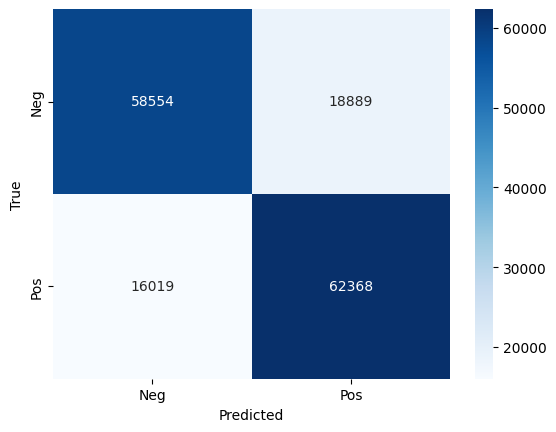

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()